In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def resumen(datos):
    return print('Forma:\n', datos.shape,'\n\n',
                 'Columnas:\n', datos.columns,'\n\n',
                 'Tipos:\n', datos.dtypes,'\n\n',
                 'Datos nulos:\n', datos.isnull().sum(),'\n\n',
                 'Cabecera:\n', datos.head(10),'\n\n',
                 'Últimos datos:\n', datos.tail(10),'\n\n',
                 'Estadísticos:\n', datos.describe([0.05,0.25,0.5,0.75,0.95])
                )
def truncar(numero, decimales = 0):
    return np.trunc(numero*10**decimales)/(10**decimales)

In [3]:
def lineal(x, a, b):
    linea = a*x + b
    return linea
def lloyd_taylor(t, ref, e0):
    # Poner t en centigrados
    t0 = 269
    resp = ref * np.exp(-e0/(t+273.16-t0))
    return resp
def gpp(par, alfa, optimo):
    # optimo = 
    gpp = -(alfa*par*optimo) / (alfa*par+optimo)
    return gpp

In [4]:
def metadata(ejex, ejey):
    # plt.title(titulo, fontsize = 60, fontweight='bold')
    plt.xlabel(ejex, fontsize = 35)
    plt.ylabel(ejey, fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    return
def cifras_signif(i, cifras = 3):
    texto = str('{:g}'.format(float('{:.{p}g}'.format(i, p = cifras))))
    return texto

In [5]:
datos = pd.read_csv(
    #'C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Completos_buenos.txt',
    'C:\\Users\\BIOMET\\Desktop\\Tesis_2\\Datos\\Completos_buenos.txt',
    delimiter = '\t',
    decimal = '.',
    na_values = -9999,
    skiprows = [1],
    encoding = 'ascii'
    )

In [6]:
resumen(datos)

Forma:
 (14442, 38) 

 Columnas:
 Index(['Year', 'DoY', 'Hour', 'NEE', 'LE', 'H', 'Rg', 'Tair', 'Tsoil', 'rH',
       'VPD', 'Ustar', 'TS1', 'TS2', 'TS3', 'TS4', 'U', 'DIR', 'PP', 'QG1',
       'QG2', 'WET', 'PAR', 'TSH1', 'HS1', 'GH1', 'TSH2', 'HS2', 'GH2', 'TSH3',
       'HS3', 'GH3', 'TSH4', 'HS4', 'GH4', 'PAR.1', '   r_err_co2[%]',
       '   noise_co2[%]'],
      dtype='object') 

 Tipos:
 Year               float64
DoY                float64
Hour               float64
NEE                float64
LE                 float64
H                  float64
Rg                 float64
Tair               float64
Tsoil              float64
rH                 float64
VPD                float64
Ustar              float64
TS1                float64
TS2                float64
TS3                float64
TS4                float64
U                  float64
DIR                float64
PP                 float64
QG1                float64
QG2                float64
WET                float64
PAR     

In [7]:
datos['Error porcent'] = datos['   r_err_co2[%]'] + datos['   noise_co2[%]']
datos['Error'] = abs(datos['Error porcent']/100 * datos['NEE'])

In [8]:
datos_invalidos = datos[pd.isna(datos['NEE'])
                        | (datos['Ustar'] < 0.14167)
                        #& (datos['Error porcent'] > 40)
                        #& (datos['Error'] > 0.5)
                       ]
datos_invalidos.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,HS3,GH3,TSH4,HS4,GH4,PAR.1,r_err_co2[%],noise_co2[%],Error porcent,Error
count,7590.0,7590.000000,7590.000000,1306.000000,1822.000000,2584.000000,7.061000e+03,7061.000000,7061.000000,7061.000000,...,3303.000000,3303.000000,7061.000000,7061.000000,7061.000000,7.040000e+03,2622.000000,2.622000e+03,2622.000000,1306.000000
mean,2018.0,162.898419,11.437434,0.818045,11.095103,-4.450039,1.124561e+02,13.562735,13.344079,79.606826,...,0.537058,0.200073,14.583281,0.414091,0.231306,1.618853e+02,57.763176,4.295253e+00,62.058429,0.601869
std,0.0,80.355066,7.341372,1.989621,53.880218,32.307059,2.237247e+02,5.868686,4.579935,14.941241,...,0.025546,0.025411,3.919057,0.049418,0.062053,3.598063e+02,105.702702,1.273268e+01,115.742697,1.157184
min,2018.0,54.000000,0.125000,-9.671600,-396.093353,-128.362328,1.840339e-12,-1.990000,1.877500,17.445000,...,0.436500,0.147000,7.200000,0.179500,0.111000,0.000000e+00,3.740930,8.315570e-14,4.026820,0.002507
1%,2018.0,55.000000,0.125000,-5.595760,-132.629236,-63.521547,1.000000e-02,0.934000,3.960500,32.660000,...,0.461000,0.168000,7.800000,0.245800,0.123000,0.000000e+00,8.653796,1.759781e-01,9.469164,0.011782
10%,2018.0,70.000000,2.125000,-0.994800,-12.731743,-24.936378,2.000000e-02,5.895000,7.030000,55.820000,...,0.475000,0.172500,8.900000,0.351000,0.150000,1.882106e-12,12.441188,5.133564e-01,13.246103,0.066471
25%,2018.0,96.000000,4.625000,0.186813,-4.700619,-13.813499,2.000000e-02,9.495000,9.412500,73.505000,...,0.540000,0.178000,10.415000,0.391500,0.172000,2.329692e-12,17.106830,7.974426e-01,17.972637,0.129211
50%,2018.0,140.000000,10.625000,0.796750,0.165801,-6.412647,3.000000e-02,13.660000,13.937500,85.400000,...,0.544000,0.195000,15.970000,0.417000,0.242000,3.057500e+00,32.317041,1.652349e+00,34.314277,0.252681
75%,2018.0,216.000000,18.625000,1.502662,10.891126,-1.656320,1.066000e+02,17.585000,16.820000,90.450000,...,0.549000,0.217500,17.625000,0.453000,0.276000,7.831125e+01,59.164235,4.356539e+00,63.779272,0.582567
90%,2018.0,285.000000,21.625000,2.795400,63.375971,6.252245,4.561500e+02,20.675000,18.787500,92.600000,...,0.554500,0.243500,19.415000,0.475500,0.314000,6.439800e+02,116.502998,9.069953e+00,124.539869,1.334149


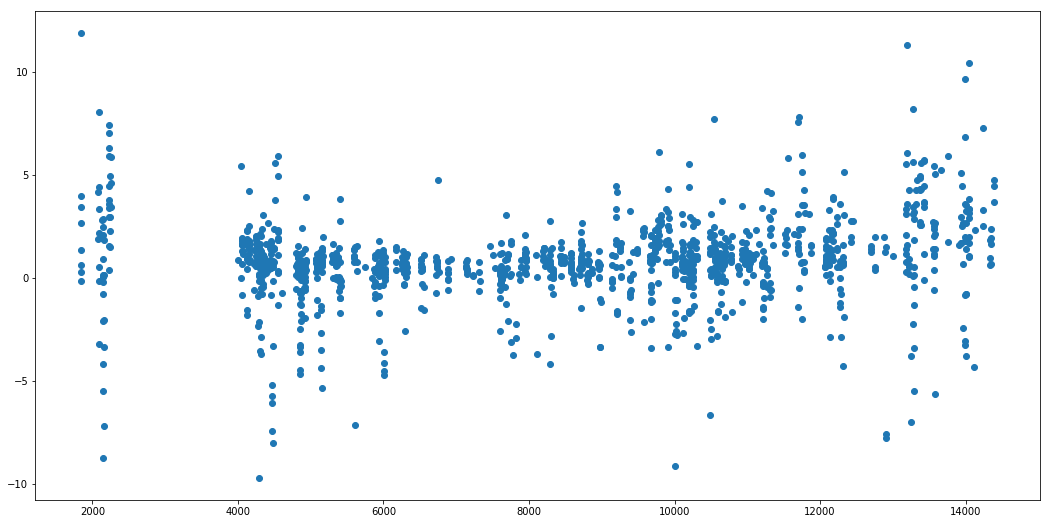

In [9]:
plt.figure(figsize=(18,9))
plt.plot(datos_invalidos.index, datos_invalidos['NEE'], 'o')

In [10]:
dias = np.arange(60, 420, 60)
ref = [8.76,5.47, 9.35, 6.39, 9.6]
e0 = [19.81, 22.89, 30.43, 23.37, 29.62]
alfa = [0.052, 0.022, 0.027, 0.015, 0.024]
optimo = [9.1, 5.27, 3.15, 5.7, 7.3]
for i in list(range(1, len(dias))):
    desde = dias[i-1]
    hasta = dias[i]
    datos_bimens = datos_invalidos[(datos_invalidos['DoY'] >= desde)
                               & (datos_invalidos['DoY'] < hasta)
                               ]
    datos_bimens['NEE'] = (gpp(datos_bimens['PAR.1'], alfa[i-1], optimo[i-1])
                           + lloyd_taylor(datos_bimens['Tsoil'], ref[i-1], e0[i-1])
                          )
    datos_invalidos['NEE'].loc[datos_bimens.index] = datos_bimens['NEE']

C:\Users\BIOMET\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\BIOMET\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


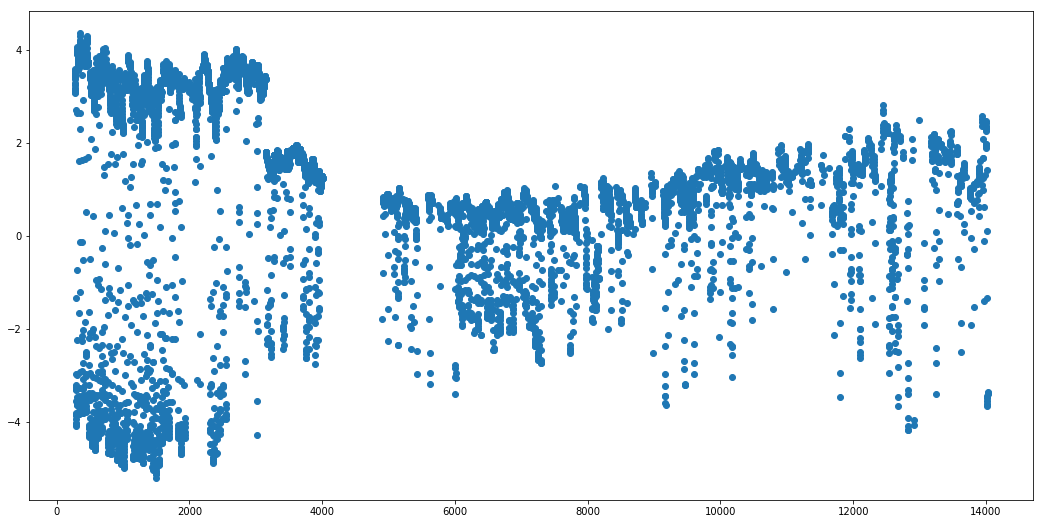

In [11]:
plt.figure(figsize=(18,9))
plt.plot(datos_invalidos.index, datos_invalidos['NEE'], 'o')

In [12]:
datos_invalidos.describe()

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,HS3,GH3,TSH4,HS4,GH4,PAR.1,r_err_co2[%],noise_co2[%],Error porcent,Error
count,7590.0,7590.000000,7590.000000,6770.000000,1822.000000,2584.000000,7.061000e+03,7061.000000,7061.000000,7061.000000,...,3303.000000,3303.000000,7061.000000,7061.000000,7061.000000,7.040000e+03,2622.000000,2.622000e+03,2622.000000,1306.000000
mean,2018.0,162.898419,11.437434,0.842078,11.095103,-4.450039,1.124561e+02,13.562735,13.344079,79.606826,...,0.537058,0.200073,14.583281,0.414091,0.231306,1.618853e+02,57.763176,4.295253e+00,62.058429,0.601869
std,0.0,80.355066,7.341372,2.184919,53.880218,32.307059,2.237247e+02,5.868686,4.579935,14.941241,...,0.025546,0.025411,3.919057,0.049418,0.062053,3.598063e+02,105.702702,1.273268e+01,115.742697,1.157184
min,2018.0,54.000000,0.125000,-5.189713,-396.093353,-128.362328,1.840339e-12,-1.990000,1.877500,17.445000,...,0.436500,0.147000,7.200000,0.179500,0.111000,0.000000e+00,3.740930,8.315570e-14,4.026820,0.002507
25%,2018.0,96.000000,4.625000,0.087604,-4.700619,-13.813499,2.000000e-02,9.495000,9.412500,73.505000,...,0.540000,0.178000,10.415000,0.391500,0.172000,2.329692e-12,17.106830,7.974426e-01,17.972637,0.129211
50%,2018.0,140.000000,10.625000,1.119998,0.165801,-6.412647,3.000000e-02,13.660000,13.937500,85.400000,...,0.544000,0.195000,15.970000,0.417000,0.242000,3.057500e+00,32.317041,1.652349e+00,34.314277,0.252681
75%,2018.0,216.000000,18.625000,2.641690,10.891126,-1.656320,1.066000e+02,17.585000,16.820000,90.450000,...,0.549000,0.217500,17.625000,0.453000,0.276000,7.831125e+01,59.164235,4.356539e+00,63.779272,0.582567
max,2018.0,355.000000,23.625000,4.368176,374.796417,435.868134,1.056500e+03,32.145000,26.927500,96.500000,...,0.571000,0.265000,21.575000,0.486000,0.349500,1.857500e+03,2804.545746,5.133502e+02,2960.108444,15.214300


In [13]:
datos['NEE'].loc[datos_invalidos.index] = datos_invalidos['NEE']

In [14]:
datos.describe()

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,HS3,GH3,TSH4,HS4,GH4,PAR.1,r_err_co2[%],noise_co2[%],Error porcent,Error
count,14442.0,14442.000000,14442.000000,13622.000000,8555.000000,9400.000000,1.305000e+04,13050.000000,13050.000000,13050.000000,...,9053.000000,9053.000000,13049.000000,13049.000000,13049.000000,13029.000000,9474.000000,9.474000e+03,9474.000000,8158.000000
mean,2018.0,204.312422,11.876896,-0.212177,56.012561,35.628278,1.661355e+02,13.521831,12.737525,75.372464,...,0.536045,0.206270,13.647395,0.409373,0.258827,295.100309,28.289173,2.243100e+00,30.532273,0.487085
std,0.0,86.858873,6.927762,3.188251,81.555715,102.742627,2.660030e+02,5.714644,4.364592,16.040827,...,0.029022,0.026463,3.700381,0.044902,0.061050,480.599387,63.124829,7.234348e+00,68.869133,1.062064
min,2018.0,54.000000,0.125000,-21.042500,-396.093353,-138.818542,1.808498e-12,-1.990000,1.877500,17.445000,...,0.436500,0.147000,7.200000,0.179500,0.111000,0.000000,3.740930,8.315570e-14,4.026820,0.000019
25%,2018.0,129.000000,5.625000,-1.882855,1.120263,-25.090914,2.500000e-02,9.585000,9.047500,65.180000,...,0.540000,0.181000,10.095000,0.388000,0.221500,0.160000,10.070260,6.246975e-01,10.849436,0.129734
50%,2018.0,204.000000,12.125000,0.544300,23.651245,-5.718156,5.875000e-01,13.210000,12.807500,80.230000,...,0.545000,0.205000,14.000000,0.413500,0.273500,11.505000,12.712403,8.950726e-01,13.553833,0.271984
75%,2018.0,280.000000,18.125000,1.716644,88.453835,60.909068,2.530000e+02,17.368750,16.198750,88.550000,...,0.550500,0.224500,16.800000,0.439000,0.309000,430.800000,23.543854,1.679522e+00,25.556799,0.518239
max,2018.0,355.000000,23.625000,14.427700,462.813309,474.566895,1.190000e+03,32.485000,26.927500,96.500000,...,0.578000,0.265000,21.575000,0.486000,0.351500,2099.500000,2804.545746,5.133502e+02,2960.108444,33.907212


In [15]:
sin_rellenar = pd.read_csv(
    #'C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Completos_buenos.txt',
    'C:\\Users\\BIOMET\\Desktop\\Tesis_2\\Datos\\Completos_buenos.txt',
    delimiter = '\t',
    decimal = '.',
    na_values = -9999,
    skiprows = [1],
    encoding = 'ascii'
    )

In [16]:
faltantes = datos[pd.isna(datos['NEE'])][:]
for i in faltantes.index:
    desde = faltantes['DoY'].loc[i] - 7
    hasta = faltantes['DoY'].loc[i] + 7
    hora = faltantes['Hour'].loc[i]
    base = sin_rellenar[(sin_rellenar['DoY'] >= desde)
                        & (sin_rellenar['DoY'] < hasta)
                        & (sin_rellenar['Hour'] == hora)
                        ]
    faltantes.loc[i] = base['NEE'].mean()
datos['NEE'].loc[faltantes.index] = faltantes['NEE']

In [17]:
datos.to_csv('C:\\Users\\BIOMET\\Desktop\\Tesis_2\\Datos\\Relleno_modelos.txt',
             #'C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Relleno_modelos.txt',
             sep = '\t',
             na_rep = -9999,
             index = False,
             columns = ['DoY', 'Hour', 'NEE']
             )

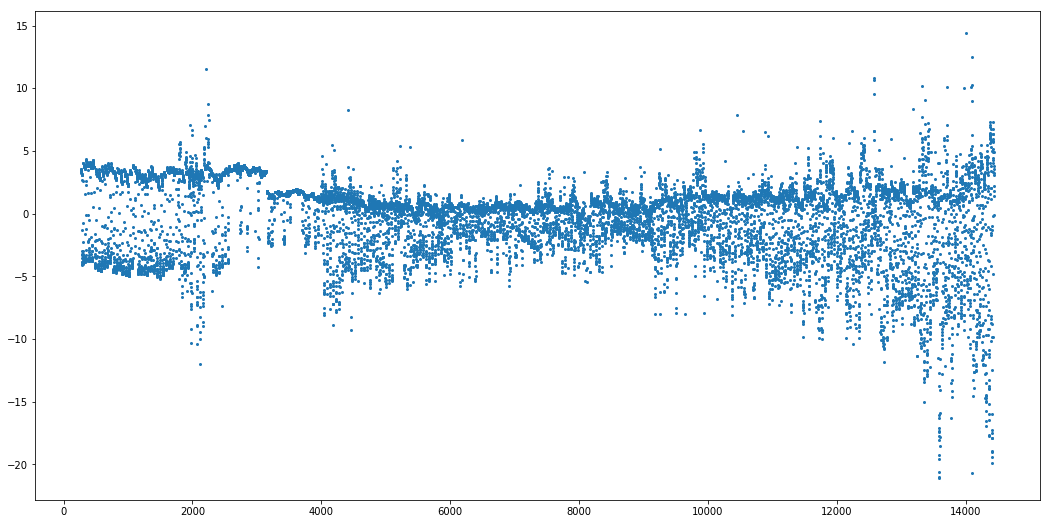

In [18]:
plt.figure(figsize=(18,9))
plt.plot(datos.index, datos['NEE'], 'o', ms = 2)

In [19]:
datos[pd.isna(datos['NEE'])].describe()

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,HS3,GH3,TSH4,HS4,GH4,PAR.1,r_err_co2[%],noise_co2[%],Error porcent,Error
count,285.0,285.000000,285.000000,0.0,0.0,0.0,284.000000,284.000000,284.000000,284.000000,...,2.000000,2.000000,284.000000,284.000000,284.000000,270.000000,0.0,0.0,0.0,0.0
mean,2018.0,60.610526,12.403509,NaN,NaN,NaN,324.583451,19.317095,18.610651,70.425669,...,0.437000,0.212250,19.570986,0.304614,0.256051,482.798481,NaN,NaN,NaN,NaN
std,0.0,21.573145,6.681324,NaN,NaN,NaN,372.770053,3.316752,2.848827,13.501258,...,0.000707,0.000354,0.636529,0.055464,0.020096,608.906366,NaN,NaN,NaN,NaN
min,2018.0,54.000000,0.125000,NaN,NaN,NaN,0.010000,12.885000,13.257500,38.885000,...,0.436500,0.212000,16.215000,0.179500,0.139000,0.000000,NaN,NaN,NaN,NaN
25%,2018.0,55.000000,7.125000,NaN,NaN,NaN,0.030000,16.576250,16.592500,57.813750,...,0.436750,0.212125,19.500000,0.259250,0.254000,0.000000,NaN,NaN,NaN,NaN
50%,2018.0,57.000000,12.625000,NaN,NaN,NaN,120.462500,19.380000,18.352500,70.242500,...,0.437000,0.212250,19.700000,0.312250,0.259000,7.122500,NaN,NaN,NaN,NaN
75%,2018.0,58.000000,18.125000,NaN,NaN,NaN,641.387500,21.857500,21.000000,83.012500,...,0.437250,0.212375,19.900000,0.327000,0.265500,1042.375000,NaN,NaN,NaN,NaN
max,2018.0,346.000000,23.625000,NaN,NaN,NaN,1056.500000,27.435000,24.670000,91.150000,...,0.437500,0.212500,20.100000,0.482000,0.271000,1729.000000,NaN,NaN,NaN,NaN


In [20]:
datos[(datos['DoY']>59) & pd.isna(datos['NEE'])].head(20)

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,HS3,GH3,TSH4,HS4,GH4,PAR.1,r_err_co2[%],noise_co2[%],Error porcent,Error
1117,2018.0,77.0,15.625,NaN,NaN,NaN,391.550,17.450,17.7025,81.125,...,NaN,NaN,18.625,0.3910,0.1605,NaN,NaN,NaN,NaN,NaN
2546,2018.0,107.0,10.125,NaN,NaN,NaN,472.500,21.320,16.8375,68.995,...,NaN,NaN,16.500,0.4750,0.1420,NaN,NaN,NaN,NaN,NaN
2649,2018.0,109.0,13.625,NaN,NaN,NaN,679.400,23.765,19.7000,70.485,...,NaN,NaN,17.215,0.4685,0.1495,NaN,NaN,NaN,NaN,NaN
2790,2018.0,112.0,12.125,NaN,NaN,NaN,212.650,21.555,19.4300,87.850,...,NaN,NaN,18.000,0.4190,0.1390,NaN,NaN,NaN,NaN,NaN
3024,2018.0,117.0,9.125,NaN,NaN,NaN,8.355,21.035,18.9575,86.350,...,NaN,NaN,17.700,0.4765,0.1725,NaN,NaN,NaN,NaN,NaN
3034,2018.0,117.0,14.125,NaN,NaN,NaN,143.200,17.430,17.7950,79.750,...,NaN,NaN,17.700,0.4820,0.1690,NaN,NaN,NaN,NaN,NaN
3035,2018.0,117.0,14.625,NaN,NaN,NaN,60.520,17.440,17.7650,80.200,...,NaN,NaN,17.700,0.4820,0.1700,NaN,NaN,NaN,NaN,NaN
3073,2018.0,118.0,9.625,NaN,NaN,NaN,264.350,16.235,14.5575,75.840,...,NaN,NaN,17.200,0.4755,0.1740,NaN,NaN,NaN,NaN,NaN
3077,2018.0,118.0,11.625,NaN,NaN,NaN,442.650,17.420,15.7175,64.470,...,NaN,NaN,17.010,0.4760,0.1735,NaN,NaN,NaN,NaN,NaN
3081,2018.0,118.0,13.625,NaN,NaN,NaN,477.550,17.465,16.5175,61.620,...,NaN,NaN,17.000,0.4760,0.1755,NaN,NaN,NaN,NaN,NaN
